# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
df = pd.read_csv('data/human_body_temperature.csv')
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


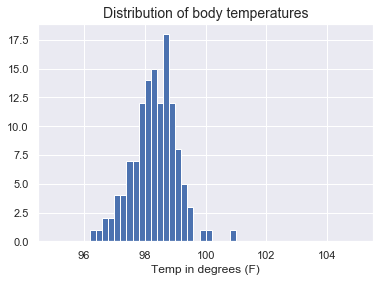

None


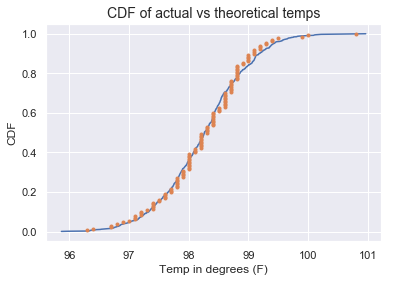

None


In [70]:
# 1.) Is the distribution of body temperatures normal?
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

# Test for normality with plotting
plt.hist(x=df['temperature'],bins=50,range=(95,105))
plt.xlabel('Temp in degrees (F)')
plt.title('Distribution of body temperatures', fontsize=14)
print(plt.show())

# Test for normality with ECDF
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y
samples = np.random.normal(98.249231,0.733183,1000)
x, y = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)
plt.plot(x_theor,y_theor)
plt.plot(x,y,marker='.',linestyle='none')
plt.xlabel('Temp in degrees (F)')
plt.ylabel('CDF')
plt.title('CDF of actual vs theoretical temps', fontsize=14)
print(plt.show())

### 1.) Is the distribution of body temperatures normal?

From the above plots, we can see that the distribution of body temperatures is approximately normal.  First, a histogram of our temperature data has the shape of a normal distribution and is centered around the mean of 98.24.  Second, if we plot the cumulative distribution function of our temperature data against a normally distributed random sampling of 1,000 samples, we can see that both the actual and theoretical distributions are normally distributed as well.

In [5]:
n = len(df)
print(n)

130


### 2. Is the sample size large? Are the observations independent?

The Central Limit Theorem categorizes a sample as "large" if it consists of > 30 observations.  Since our sample consists of 130 observations, we can make the assumption that our sample approximates a normal distribution.

Since we can only assume that one person's temperature does not have any impact on another person's temperature, we can consider the observations independent.  If the temperature readings were taken in a single room filled with 130 people, we might be less inclined to consider these observations independent of one another.

In [6]:
# Bootstrap hypothesis testing

# Set bootstrap functions
def bootstrap_replicate_func(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_func(data,func)
    return bs_replicates

# Calculate p-value using replicates
bs_replicates = draw_bs_reps(data=df['temperature'], func=np.mean, size=10000)
p = np.sum(bs_replicates >= 98.6) / 10000
print('p = ', p)

p =  0.0


### 3. Is the true population mean really 98.6 degrees F?

#### Bootstrap Hypothesis Test

Using a bootstrap hypothesis test, we are testing a null hypothesis that the mean of the sample (temperature) and the mean of the overall population (98.6) are the same.  Since we are testing the mean, we will want to draw bootstrap replicates using np.mean for our test.  Since the mean of our data is 98.24, we will want to calculate a p-value that tells us how many of those replicates are at least as extreme as 98.6 (in other words, larger than the sample mean of 98.24).

Using those assumptions, we get a p-value of 0, which suggests that we should reject the null hypothesis and assume that the true population mean is different from the mean of the sample.


In [7]:
# One Sample z-test & p-value (two tailed test)
z = (np.mean(df['temperature'])-98.6)/(np.std(df['temperature'])/np.sqrt(130))
print("z = ",z)

import scipy.stats as stats
p1 = stats.norm.cdf(z)*2
print("p = ",p1)

# One Sample t-test (two tailed test)
t = (np.mean(df['temperature'])-98.6)/(np.std(df['temperature'])/np.sqrt(130))
print("t = ",t)
critical_value = stats.t.ppf(.05/2,130-1)
print("critical value = ",critical_value)

z =  -5.475925202078116
p =  4.3523151658821886e-08
t =  -5.475925202078116
critical value =  -1.9785244914586055


#### Frequentist Tests

*One Sample Z-Test*

We only have one sample mean to compare to the "true population" mean, so we'll be performing a one sample test.  Since our sample size according to the CLT is "large" (>30), we can use a z-test.  Assuming a normal distribution (as we established above), we can use this one sample z-test to test whether our sample mean is equal to 98.6.  In other words:

Ho: x - 98.6 = 0  
H1: x - 98.6 =/= 0

Since we do not know our population standard deviation, we use the CLT to get our z-score, dividing our sample standard deviation by the square root of our sample size.

This yields a z-score of -5.48.  If we use a confidence interval of 95% for our mean, we would expect our z-score to be between -1.96 and 1.96.  Given our z-score outside this range (-5.48 < -1.96), we can reject the null hypothesis.

*P-Value*

Using the z-score calculated above, we can also use a p-value to calculate the probability that the sample mean is equal to the population mean.  Since the alternative hypothesis does not specify the sample mean being greater than or less than the population mean, we can use a two-tailed test and multiply our calculation by 2 to get the p-value.  Since we end up with a p-value of .0000000435 (< .05), we can again reject the null hypothesis.

*One Sample T-Test*

Similarly, we could use a t-test.  Since we used a 95% confidence interval for our z-test, we would use an α of 0.05 for our t-test, with 129 (n-1) degrees of freedom.  This yields a critical value of -1.98 and a t-score of -5.48, which would reject our null hypothesis just like the z-test did.

*Conclusion*

The ideal test to use in this case is the z-test.  As we said before, since our sample size is large enough and our sample distribution is normal, this is a preferred method of testing.  That said, there's not a huge difference between the two tests.  Both tests reject the null hypothesis.  If our z/t scores were closer to the limits of our confidence interval of the mean or our critical t-values, respectively, the type of test selected would have more of an impact on the final result.

In [46]:
# Random sampling of 10
np.random.seed(17)
tempsamp = np.random.choice(df['temperature'],10)
print(tempsamp)

# One Sample z-test & p-value
z = (np.mean(tempsamp)-98.6)/(np.std(tempsamp)/np.sqrt(10))
print("z = ",z)

import scipy.stats as stats
p1 = stats.norm.cdf(z)*2
print("p = ",p1)

# One Sample t-test
t = (np.mean(tempsamp)-98.6)/(np.std(tempsamp)/np.sqrt(10))
print("t = ",t)
critical_value = stats.t.ppf(.05/2,10-1)
print("critical value = ",critical_value)

[98.  98.2 98.6 97.6 98.7 96.4 98.8 98.7 98.2 98.4]
z =  -2.0330320879263
p =  0.04204928125860522
t =  -2.0330320879263
critical value =  -2.262157162740992


### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

The correct test to use in this application is the t-test.  Since our sample is < 30, the t-test is the more accurate measure than the z-test.

In addition to the general guidelines around z vs t tests, we can also very clearly see the issues with using a z test in this scenario.  In our t-test, the critical value sits at -2.26 and our t-statistic is -2.03, a value that falls perfectly within the critical range and allows us to accept the null hypothesis.  
However, using a z-test doesn't give us as definitive of an answer.  The z-score of -2.03 is just outside the -1.96 lower limit of the 95% confidence interval of the mean.  It also yields a rather small p-value of 0.04 (< .05), which might lead us to rejecting the null hypothesis.

This exercise clearly demonstrates the sensitivity of a small sample to the frequentist method chosen for a hypothesist test.

In [62]:
# Calculate margin of error & confidence interval

# A 95% confidence interval would be +- 1.96 std from the mean
mean = np.mean(df['temperature'])
sd = np.std(df['temperature'])
CI_upper = mean + (sd * 1.96)
CI_lower = mean - (sd * 1.96)

print('Upper Limit Confidence Interval ' + str(CI_upper))
print('Lower Limit Confidence Interval ' + str(CI_lower))

Upper Limit Confidence Interval 99.68073201588466
Lower Limit Confidence Interval 96.8177295225769


### 5. At what temperature should we consider someone's temperature to be "abnormal"?

Given a 95% confidence interval of the means, any body temperature below 96.8 or above 99.7 should be considered 'abnormal'.

In [72]:
maletemps = (df[df['gender']=='M'])
femaletemps = (df[df['gender']=='F'])
print("Sample sizes for male and female = ",len(maletemps),",",len(femaletemps))

# z score
diffmeans = np.mean(maletemps['temperature'])-np.mean(femaletemps['temperature'])
se = (np.std(maletemps['temperature'])/np.sqrt(65))+(np.std(femaletemps['temperature'])/np.sqrt(65))
z = diffmeans/se
print("z =",z)

# p value
p2 = stats.norm.cdf(z)*2
print("p = ",p2)

Sample sizes for male and female =  65 , 65
z = -1.6294058357441952
p =  0.10322713421648631


### 6. Is there a significant difference between males and females in normal temperature?

*Two Sample Z-Test*

Since, in this case, we are comparing two sample means to each other, and our sample sizes are still considered "large" according to the CLT (65 > 30), we can use a two sample z-test for our hypothesis testing.  Our null hypothesis for this test is that the mean of male temperature - the mean of female temperature = 0, and our alternative hypothesis is that the mean of male temperature - the mean of female temperature != 0.  In other words:

Ho: x1 - x2 = 0  
H1: x1 - x2 =/= 0

This yields a z-score of -1.62. If we use a confidence interval of 95% for our mean, we would expect our z-score to be between -1.96 and 1.96. Given our z-score is inside this range (-1.62 > -1.96), we cannot reject the null hypothesis.

*P-value*

Since our p-value ends up at 0.10, which is greater than our α of 0.05, we again cannot reject the null hypothesis that there is no significant difference between the mean male temperature and the mean female temperature.

*Conclusion*

In this sample, there is no significant difference in mean body temperatures of males and females.